In [1]:
import pandas as pd
import numpy as np

In [2]:
dataframe = pd.read_csv('train.csv/train.csv')

In [3]:
dataframe.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
dataframe.shape

(404290, 6)

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
id              404290 non-null int64
qid1            404290 non-null int64
qid2            404290 non-null int64
question1       404290 non-null object
question2       404288 non-null object
is_duplicate    404290 non-null int64
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [6]:
dataframe['is_duplicate'].value_counts()

0    255027
1    149263
Name: is_duplicate, dtype: int64

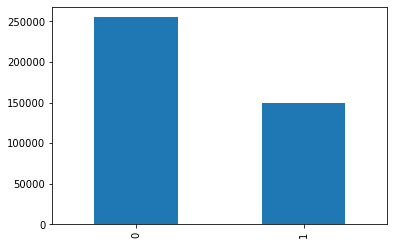

In [7]:
dataframe['is_duplicate'].value_counts().plot(kind = 'bar')


In [12]:
qid1_list = dataframe['qid1'].tolist()
qid2_list = dataframe['qid2'].tolist()

In [13]:
questions = pd.Series(qid1_list + qid2_list)

In [14]:
unique_questions = len(np.unique(questions))

In [16]:
print("Number of unique questions:",unique_questions)

Number of unique questions: 537933
